In [1]:
"""
모두 준수한 실루엣 점수를 보인다. 

random_state=0 #KMeans, MeanShift(bandwidth), GaussianMixture

KMeans
n = 6
Silhouette Coefficient: 0.5914
Davies Bouldin Index: 0.3922


AgglomerativeClustering
n = 5
Silhouette Coefficient: 0.5740
Davies Bouldin Index: 0.4102


AffinityPropagation
Silhouette Coefficient: 0.5823
Davies Bouldin Index: 0.4142

MeanShift
quantile=0.2
n_samples = 13
=> bandwidth
Silhouette Coefficient: 0.6012
Davies Bouldin Index: 0.3302

Birch
n=13
Silhouette Coefficient: 0.6229
Davies Bouldin Index: 0.3374

GaussianMixture
n =12
Silhouette Coefficient: 0.6247
Davies Bouldin Index: 0.3561
"""

'\n모두 준수한 실루엣 점수를 보인다. \n\nrandom_state=0 #KMeans, MeanShift(bandwidth), GaussianMixture\n\nKMeans\nn = 6\nSilhouette Coefficient: 0.5914\nDavies Bouldin Index: 0.3922\n\n\nAgglomerativeClustering\nn = 5\nSilhouette Coefficient: 0.5740\nDavies Bouldin Index: 0.4102\n\n\nAffinityPropagation\nSilhouette Coefficient: 0.5823\nDavies Bouldin Index: 0.4142\n\nMeanShift\nquantile=0.2\nn_samples = 13\n=> bandwidth\nSilhouette Coefficient: 0.6012\nDavies Bouldin Index: 0.3302\n\nBirch\nn=13\nSilhouette Coefficient: 0.6229\nDavies Bouldin Index: 0.3374\n\nGaussianMixture\nn =12\nSilhouette Coefficient: 0.6247\nDavies Bouldin Index: 0.3561\n'

In [2]:
# 참고 ) https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-2

## 패키지 준비

In [3]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

import copy

## 데이터 준비
결측치 확인, 상관계수 확인, PCA, MinMaxScaling 등

In [4]:
path = 'C:/bigcon/'
df_pre = pd.read_csv(path + 'output\data\k_table.csv', encoding='CP949')

In [5]:
df_pre.head(3)

adng_nm  기존충전소      세대수  주차가능수  주요건물수(영화관,대형점포)
0     구갈동    112  10839.0  546.0                4
1     구성동    145  12235.0  122.0                2
2     기흥동    204   6119.0   34.0                2

In [6]:
df_raw = pd.read_csv(path + 'output\data\k_table_final.csv', index_col=0)
df_raw.reset_index(drop = True, inplace = True)

In [7]:
df_raw.head()

세대수  주차가능수       bpi  ev_traffic       포화도  x_x  x_y
0  10839.0  546.0  0.038676   16.838410  0.000345    1    4
1  12235.0  122.0  0.035247    6.826027  0.000243    0    2
2   6119.0   34.0  0.023412    3.861742  0.000115    0    2
3   6800.0  122.0  0.025461    4.258176  0.000331    0    0
4   9419.0    0.0  0.010546    3.189948  0.000153    0    0

In [8]:
df_raw['adng_nm'] = df_pre['adng_nm']

In [9]:
df_raw.head(3)

세대수  주차가능수       bpi  ev_traffic       포화도  x_x  x_y adng_nm
0  10839.0  546.0  0.038676   16.838410  0.000345    1    4     구갈동
1  12235.0  122.0  0.035247    6.826027  0.000243    0    2     구성동
2   6119.0   34.0  0.023412    3.861742  0.000115    0    2     기흥동

In [10]:
df_corr = df_raw[:]

In [11]:
df_corr.columns = ['#ofhouseholds', '#ofparkingAvailable', 'bpi', 'ev_traffic',
       'saturation', 'x_x', 'x_y', 'adng_nm']

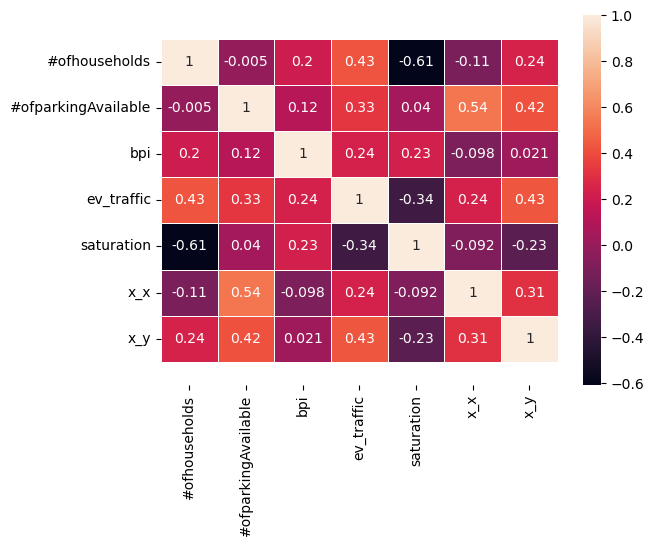

In [12]:
g = sns.heatmap(df_corr.corr(), annot=True, linewidths=.5)
bottom, top = g.get_ylim() # heatmap plot이 잘리는 것 방지하기 위한 방법
g.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [13]:
df = df_raw.iloc[:,:-1]

In [14]:
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df.shape

(35, 2)

In [15]:
df = pd.DataFrame(df)

## K-means (1)
elbow curve를 그려서 경사가 급격히 변하는 포인트를 확인

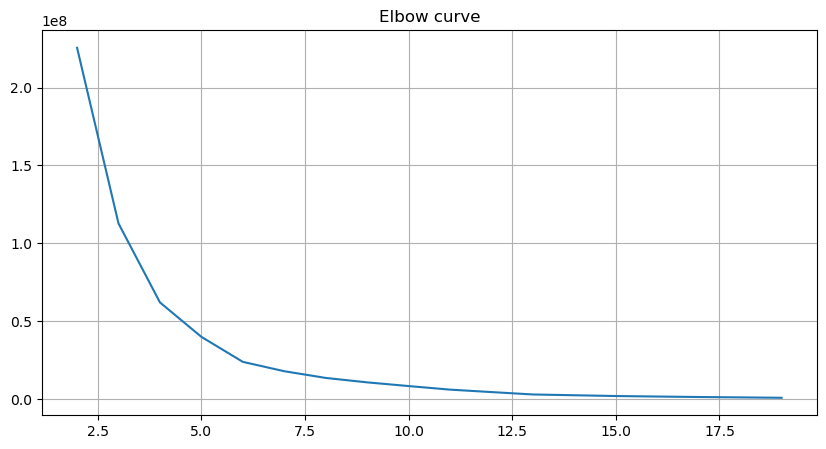

In [16]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df) # df is array
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [17]:
n_clusters = 5 # FIX ME 

In [18]:
df = pd.DataFrame(df)

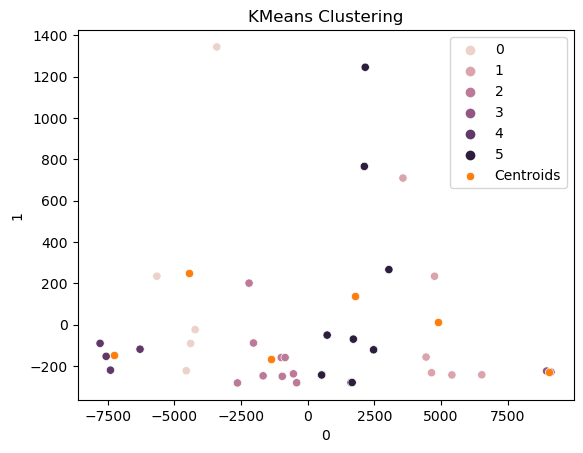

Silhouette Coefficient: 0.5658
Davies Bouldin Index: 0.4429


In [19]:
n = [6] # 6
for i in n:
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  cluster = km.fit(df) # df는 DataFrame
  cluster_id = pd.DataFrame(cluster.labels_)
  d1 = pd.concat([df, cluster_id], axis=1)


  d1.columns = [0, 1, "cluster"]
  sns.scatterplot(d1[0], d1[1], hue = d1['cluster'], legend="full")
  sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label = 'Centroids')
  plt.title("KMeans Clustering")
  plt.legend()
  plt.show()


  # 실루엣 계수가 클수록, Davies Bouldin Index가 작을수록 좋다
  print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d1.iloc[:,:-1], d1['cluster'])))
  print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d1.iloc[:,:-1], d1['cluster'])))

## DBSCAN (2)
- eps: 입실론 주변영역(반경) , 군집 원 반지름의 크기 (default : 0.5)
- min_samples: 입실론 반경 포함되는 최소 샘플의 갯수 (default : 5)

In [20]:
# # Not Scaled 
# eps = [2,5,7,8,10]
# for i in eps:
#     db = DBSCAN(eps=i, min_samples=4)
#     cluster = db.fit(df)
#     cluster_id = pd.DataFrame(cluster.labels_)
    
#     d2 = pd.DataFrame()
#     d2 = pd.concat([df,cluster_id],axis=1)

#     # 시각화 부분으로 PCA를 통해 변수를 2개로 줄이면 사용 가능
    
#     d2.columns = [0, 1, "cluster"]
    
#     sns.scatterplot(d2[0], d2[1], hue = d2['cluster'], legend="full")
#     plt.title('DBScan with eps {}'.format(i))
#     plt.show()
    
#     # 실루엣 계수가 클수록, Davies Bouldin Index가 작을수록 좋다
#     print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d2.iloc[:,:-1], d2["cluster"])))
#     print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d2.iloc[:,:-1], d2["cluster"])))

In [21]:
# # Scaled
# ss = StandardScaler()
# scaled_df = pd.DataFrame(ss.fit_transform(df))

# eps = [0.5]
# for i in eps:
#     db = DBSCAN(eps=i, min_samples=4)
#     cluster = db.fit(scaled_df)
#     cluster_id = pd.DataFrame(cluster.labels_)
    
#     d3 = pd.DataFrame()
#     d3 = pd.concat([scaled_df,cluster_id],axis=1)
    
#     d3.columns = [0, 1, "cluster"]
    
#     sns.scatterplot(d3[0], d3[1], hue = d3['cluster'], legend="full")
#     plt.title('DBScan with eps {}'.format(i))
#     plt.show()
    

#     # 실루엣 계수가 클수록, Davies Bouldin Index가 작을수록 좋다
#     print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d3.iloc[:,:-1], d3["cluster"])))
#     print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d3.iloc[:,:-1], d3["cluster"])))

## Hierarchical agglomerative clustering

특정 클러스터 개수보다 많아질 경우 Cluster 간의 거리가 급격히 줄어들면 자른다.

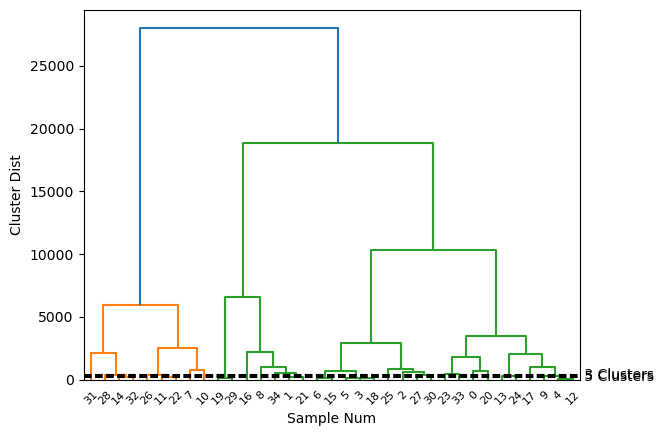

In [22]:
linkage_array = ward(df)
dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')
ax.plot(bounds, [200, 200], '--', c='k')
ax.text(bounds[1], 350, ' 3 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 200, ' 5 Clusters ', va='center', fontdict={'size': 10})
plt.show()

## Agglomerative Clustering 

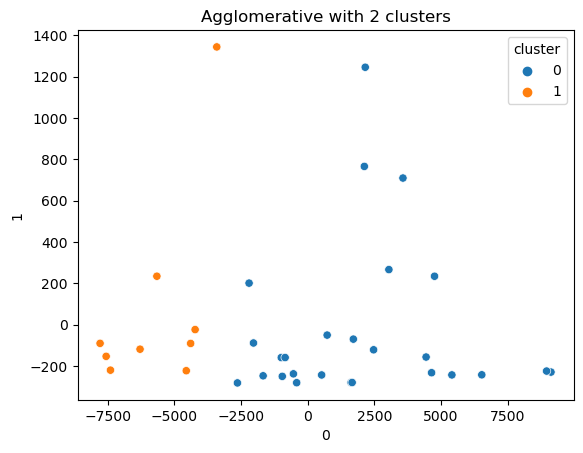

Silhouette Coefficient: 0.5064
Davies Bouldin Index: 0.5379


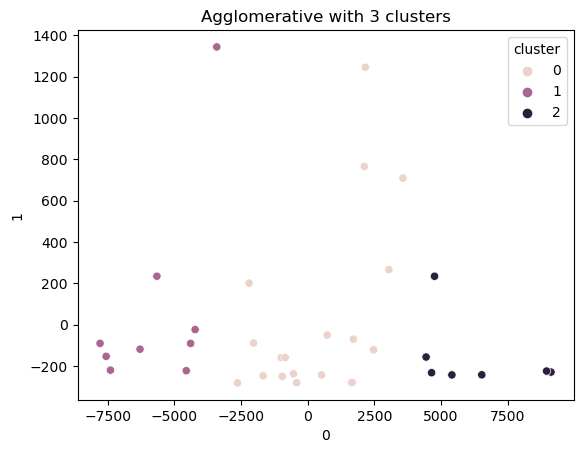

Silhouette Coefficient: 0.5113
Davies Bouldin Index: 0.5573


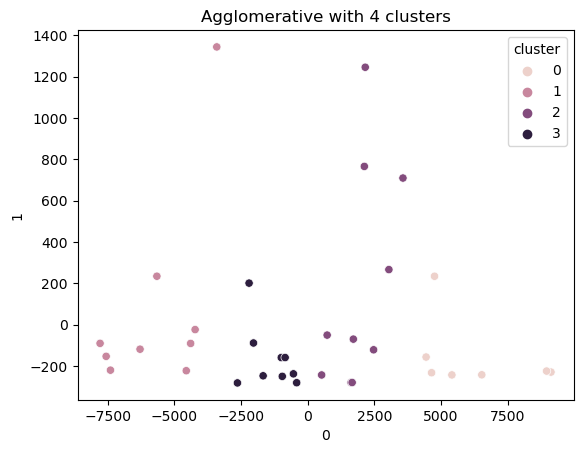

Silhouette Coefficient: 0.5242
Davies Bouldin Index: 0.5492


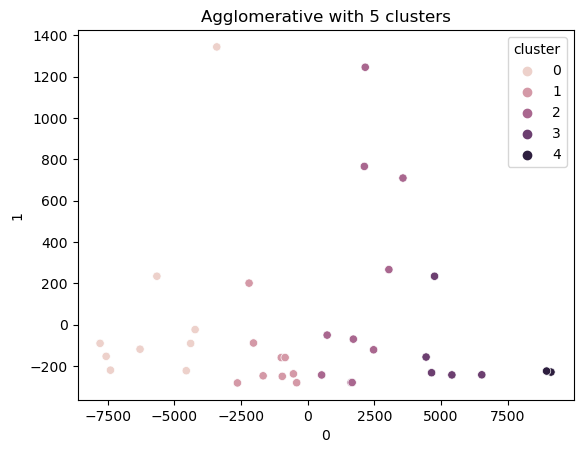

Silhouette Coefficient: 0.5608
Davies Bouldin Index: 0.4393


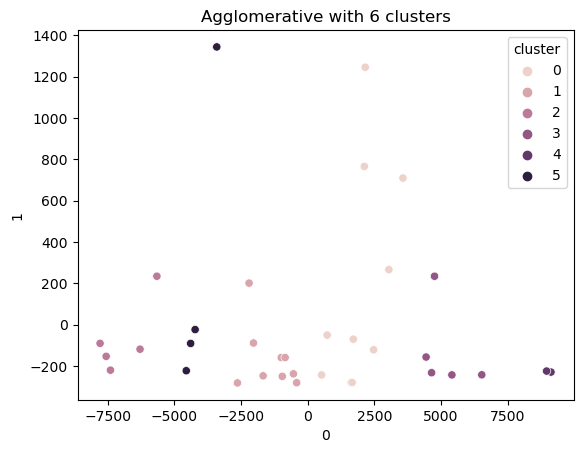

Silhouette Coefficient: 0.5618
Davies Bouldin Index: 0.4536


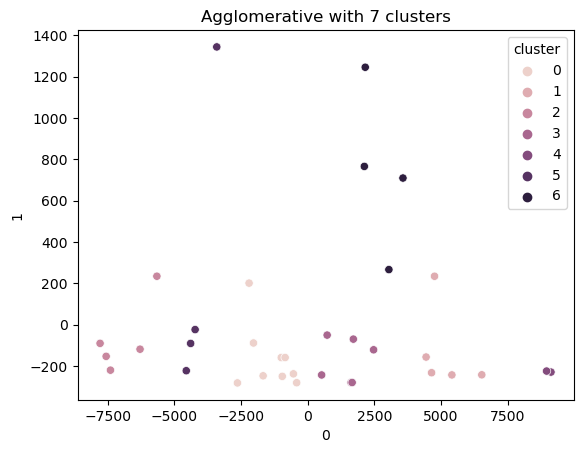

Silhouette Coefficient: 0.5257
Davies Bouldin Index: 0.5509


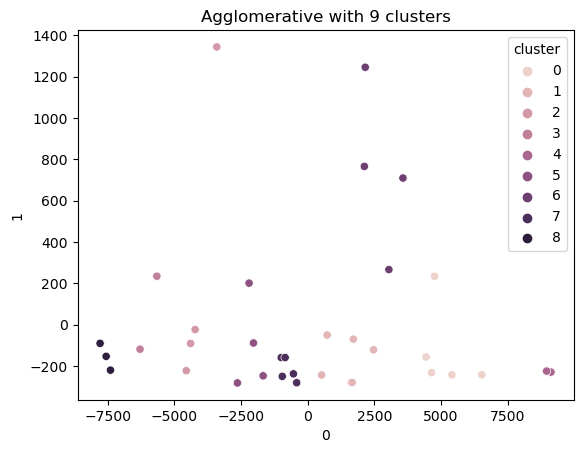

Silhouette Coefficient: 0.5454
Davies Bouldin Index: 0.5208


In [23]:
n = [2,3,4,5,6,7,9] # 6
for i in n:
    agg = AgglomerativeClustering(n_clusters=i)
    cluster = agg.fit(df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([df,cluster_id],axis=1)

    # 시각화 부분으로 PCA를 통해 변수를 2개로 줄이면 사용 가능

    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()


    # 실루엣 계수가 클수록, Davies Bouldin Index가 작을수록 좋다
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

## Affinity Propagation (5)
모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다.

만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.


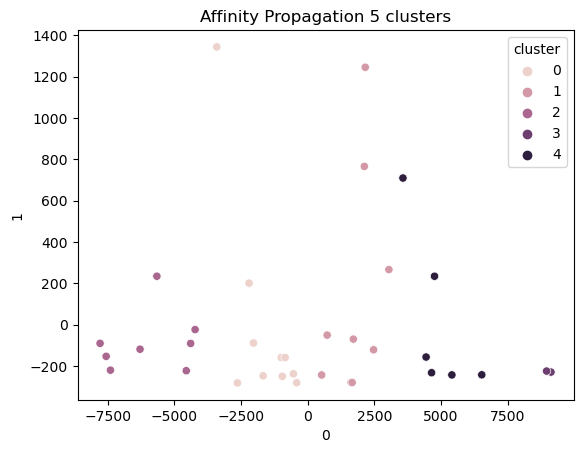

Silhouette Coefficient: 0.5589
Davies Bouldin Index: 0.4531


In [24]:
ap = AffinityPropagation() # 5
cluster = ap.fit(df)
cluster_id = pd.DataFrame(cluster.labels_)

d5 = pd.DataFrame()
d5 = pd.concat([df,cluster_id],axis=1)


d5.columns = [0, 1, "cluster"]

sns.scatterplot(d5[0], d5[1], hue = d5['cluster'], legend="full")
plt.title('Affinity Propagation {} clusters'.format(len(d5.cluster.unique())))
plt.show()


print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d5.iloc[:,:-1], d5['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d5.iloc[:,:-1], d5['cluster'])))

### Mean Shift (6)
- 평균 이동(Mean Shift)는 K-Means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이며 군집화 진행
- 평균 이동: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동한다.

각 점들에 대해 데이터의 분포에서 mode를 찾아 이동하다보면 점들이 적당하게 모일 것이라는 것이라는 아이디어

bandwidth : 얼마나 관대하게 봐줄지를 설정하는 폭

## 주로 사용하는 파라미터
- bandwidth = n, bandwidth의 크기에 따른 군집화 영향도가 매우크다.
- 최적의 bandwidth을 찾아야한다.

### 참고
- bandwidth의 적정값을 estimate_bandwidth함수로 출력 가능
-  quantile = n,  데이터 개수의 일정 비율만큼 샘플링하면서 mean shift하게됨
-  따라서, 데이터 개수가 엄청 많아질시 quantile값이 적으면 시간이 너무 오래걸림

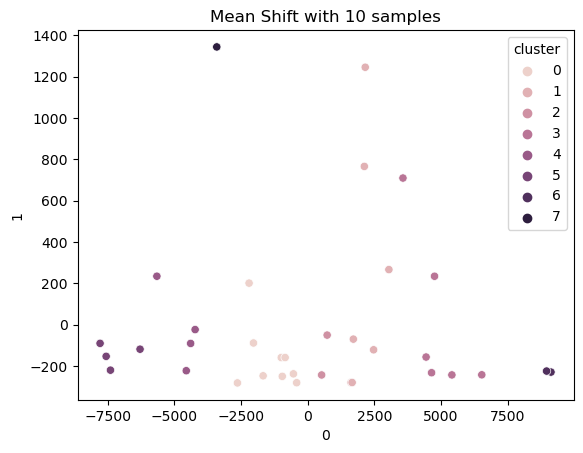

Silhouette Coefficient: 0.4688
Davies Bouldin Index: 0.4150


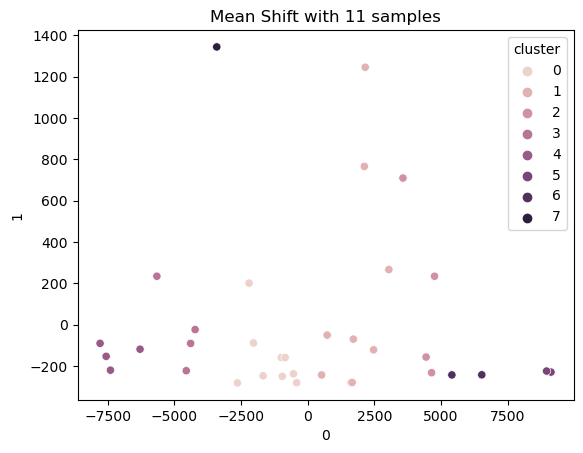

Silhouette Coefficient: 0.5032
Davies Bouldin Index: 0.4504


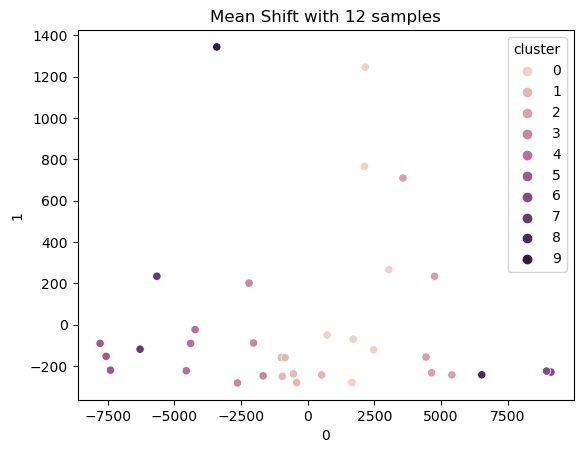

Silhouette Coefficient: 0.5350
Davies Bouldin Index: 0.3529


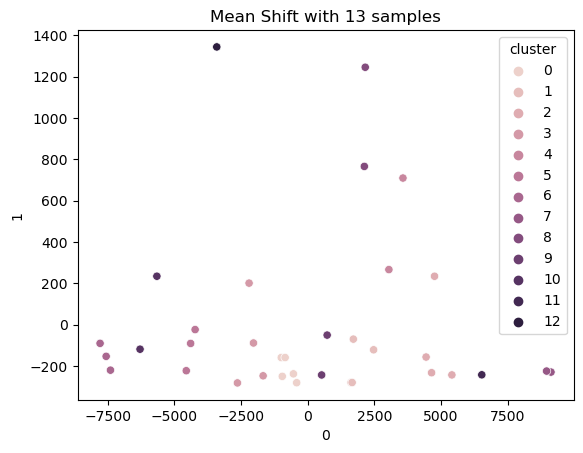

Silhouette Coefficient: 0.6109
Davies Bouldin Index: 0.3456


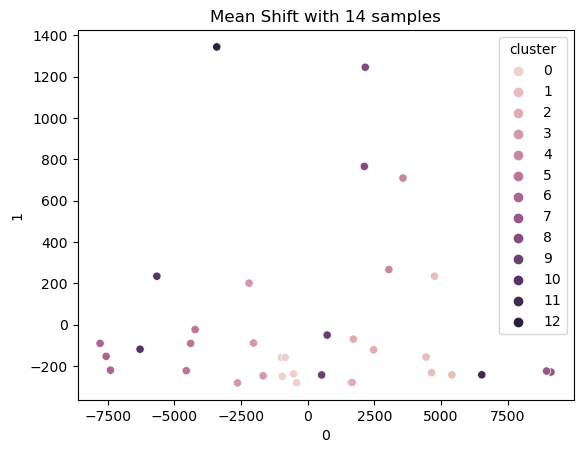

Silhouette Coefficient: 0.6109
Davies Bouldin Index: 0.3456


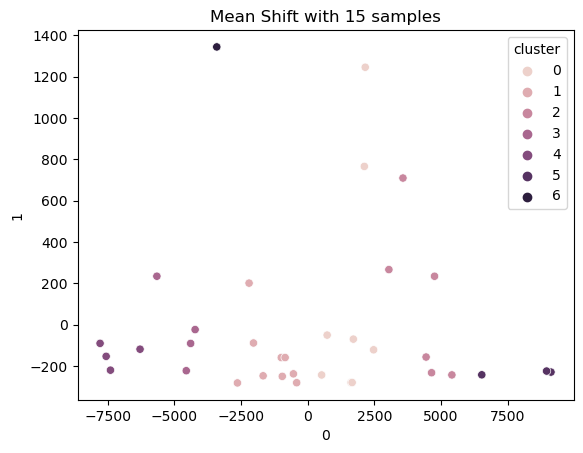

Silhouette Coefficient: 0.5086
Davies Bouldin Index: 0.4508


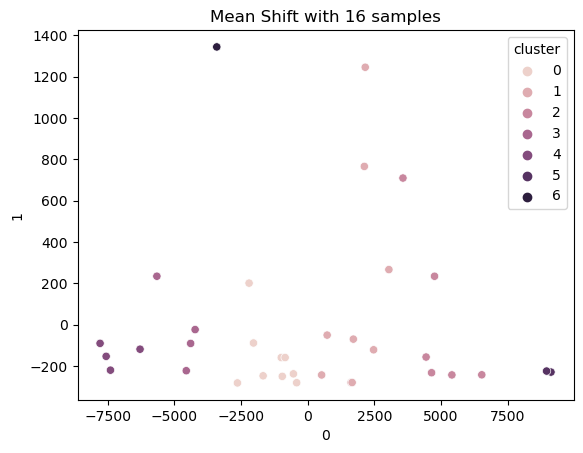

Silhouette Coefficient: 0.5420
Davies Bouldin Index: 0.3989


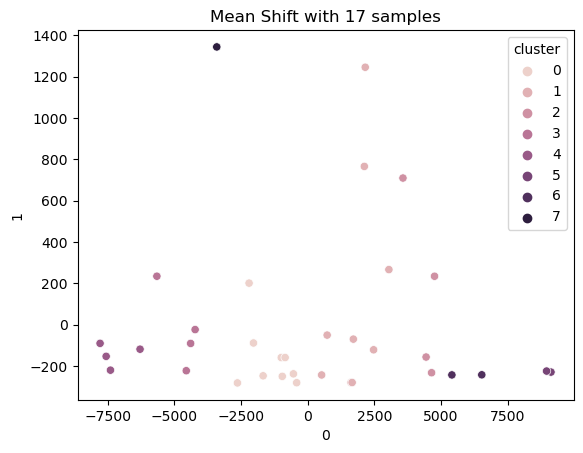

Silhouette Coefficient: 0.5032
Davies Bouldin Index: 0.4504


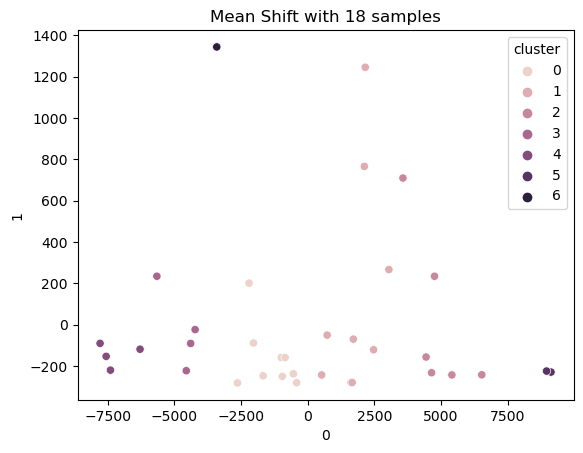

Silhouette Coefficient: 0.5420
Davies Bouldin Index: 0.3989


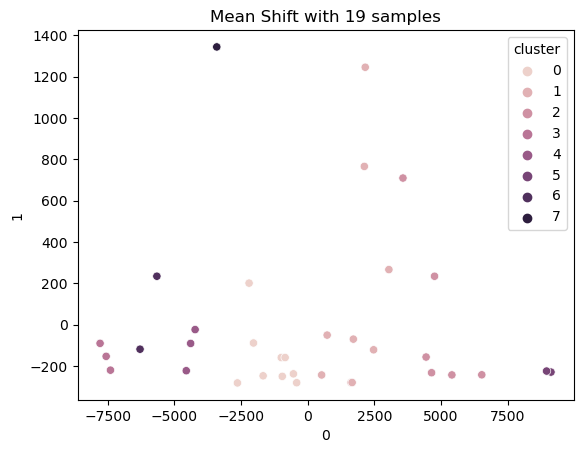

Silhouette Coefficient: 0.5753
Davies Bouldin Index: 0.3683


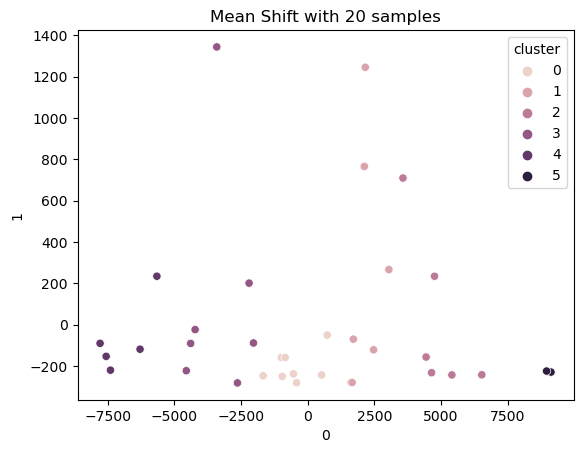

Silhouette Coefficient: 0.5175
Davies Bouldin Index: 0.5027


In [25]:
n = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]    # 13
for i in n:
    bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=i, random_state=0)
    ms = MeanShift(bandwidth=bandwidth)
    cluster = ms.fit(df)
    cluster_id = pd.DataFrame(cluster.labels_)

    d6 = pd.DataFrame()
    d6 = pd.concat([df,cluster_id],axis=1)


    d6.columns = [0, 1, "cluster"]

    sns.scatterplot(d6[0], d6[1], hue = d6['cluster'], legend="full")
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()


    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d6.iloc[:,:-1], d6['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d6.iloc[:,:-1], d6['cluster'])))

## Minibatch K means (7)
- n_cluster = n , default=8  클러스터 갯수
- batch_size = n , default=1024 

데이터를 미니배치 크기만큼 무작위로 분리하여 K-평균 군집화 진행

In [26]:
# batch_size = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
# for i in batch_size:
#     kmeans = MiniBatchKMeans(n_clusters=6, batch_size=i, random_state=0) #n_clusters는 elbow 사용
#     cluster = kmeans.fit(df)
#     cluster_id = pd.DataFrame(cluster.labels_)

#     d7 = pd.DataFrame()
#     d7 = pd.concat([df,cluster_id],axis=1)


#     d7.columns = [0, 1, "cluster"]

#     sns.scatterplot(d7[0], d7[1], hue = d7['cluster'], legend="full")
#     plt.title('Minibatch K-means with {} samples'.format(i))
#     plt.show()


#     print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d7.iloc[:,:-1], d7['cluster'])))
#     print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d7.iloc[:,:-1], d7['cluster'])))

## Birch (8)

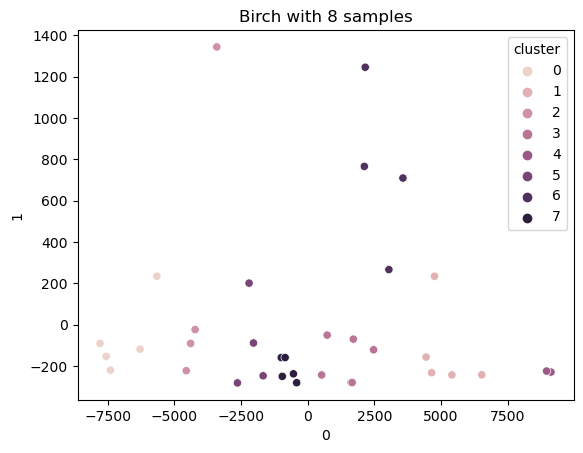

Silhouette Coefficient: 0.5333
Davies Bouldin Index: 0.5364


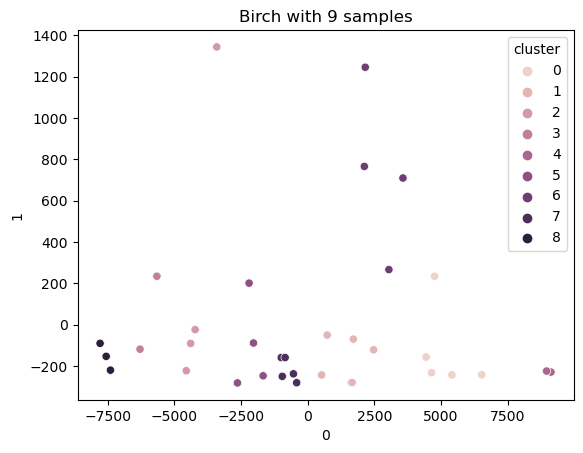

Silhouette Coefficient: 0.5454
Davies Bouldin Index: 0.5208


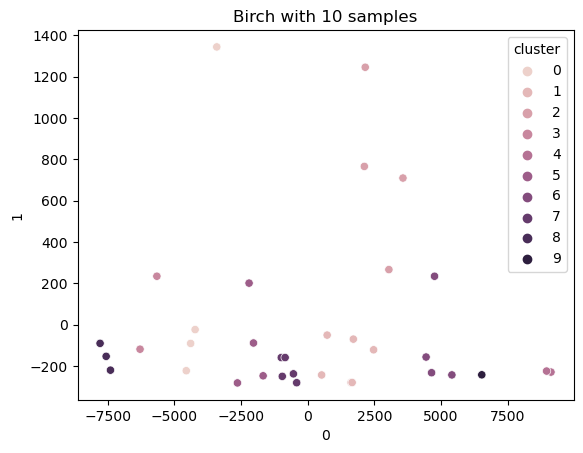

Silhouette Coefficient: 0.5307
Davies Bouldin Index: 0.4780


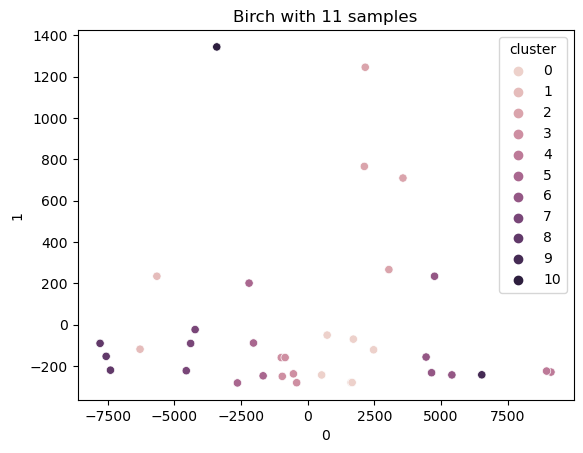

Silhouette Coefficient: 0.5512
Davies Bouldin Index: 0.3995


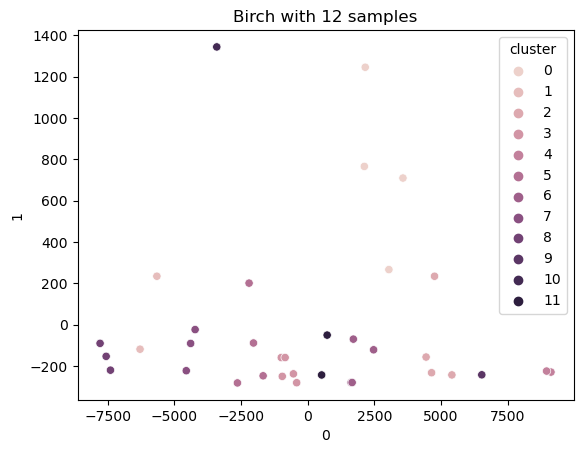

Silhouette Coefficient: 0.5783
Davies Bouldin Index: 0.3968


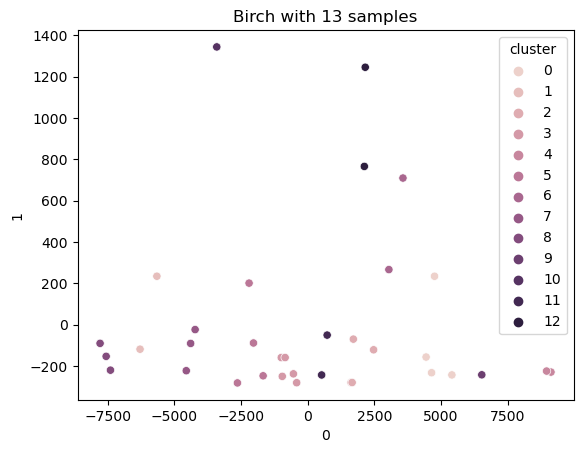

Silhouette Coefficient: 0.6109
Davies Bouldin Index: 0.3456


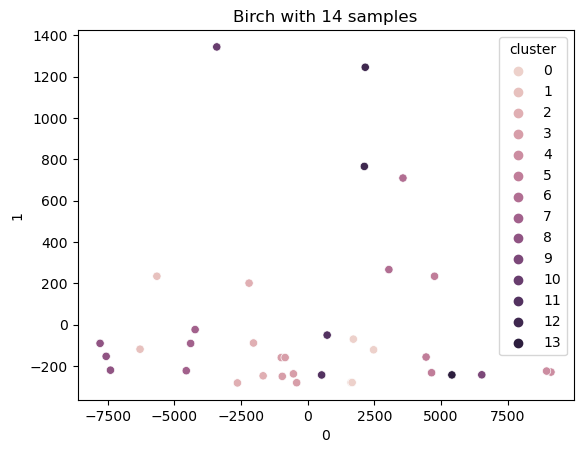

Silhouette Coefficient: 0.5934
Davies Bouldin Index: 0.3288


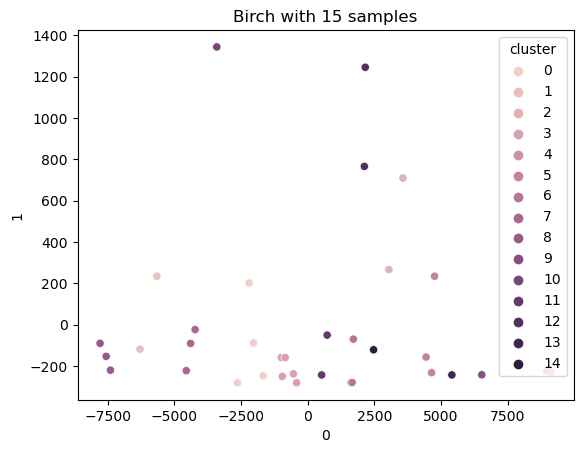

Silhouette Coefficient: 0.5856
Davies Bouldin Index: 0.3087


In [27]:
n = [8, 9, 10 ,11 ,12 ,13, 14 , 15]    # 13
for i in n:
    
    birch = Birch(n_clusters=i) # threshold 0.5, branching_factor 50
    cluster = birch.fit(df)
    cluster_id = pd.DataFrame(cluster.labels_) 

    d8 = pd.DataFrame()
    d8 = pd.concat([df,cluster_id],axis=1)


    d8.columns = [0, 1, "cluster"]

    sns.scatterplot(d8[0], d8[1], hue = d8['cluster'], legend="full")
    plt.title('Birch with {} samples'.format(i))
    plt.show()


    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d8.iloc[:,:-1], d8['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d8.iloc[:,:-1], d8['cluster'])))

In [28]:
import sklearn
sklearn.__version__

'0.22'

## OPTICS (9)

In [29]:
# xi = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.4]   # default 0.05 float between 0 and 1
# for i in xi:
#     optics = OPTICS(min_samples=4, xi=i) # min_samples default 5
#     cluster = optics.fit(df)
#     cluster_id = pd.DataFrame(cluster.labels_)

#     d9 = pd.DataFrame()
#     d9 = pd.concat([df,cluster_id],axis=1)

    
#     d9.columns = [0, 1, "cluster"]

#     sns.scatterplot(d9[0], d9[1], hue = d9['cluster'], legend="full")
#     plt.title('OPTICS with {} samples'.format(i))
#     plt.show()
    

#     print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d9.iloc[:,:-1], d9["cluster"])))
#     print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d9.iloc[:,:-1], d9["cluster"])))

## Spectral Clustering (10)

In [30]:
# n = [2, 4, 6, 8]  
# for i in n:
#     SC = SpectralClustering(n_clusters=i)
#     cluster = SC.fit(df)
#     cluster_id = pd.DataFrame(cluster.labels_)

#     d10 = pd.DataFrame()
#     d10 = pd.concat([df,cluster_id],axis=1)

    
#     d10.columns = [0, 1, "cluster"]

#     sns.scatterplot(d10[0], d10[1], hue = d10['cluster'], legend="full")
#     plt.title('Spectral Clustering with {} samples'.format(i))
#     plt.show()
    

#     print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d10.iloc[:,:-1], d10["cluster"])))
#     print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d10.iloc[:,:-1], d10["cluster"])))

## Gaussian Mixture (11)

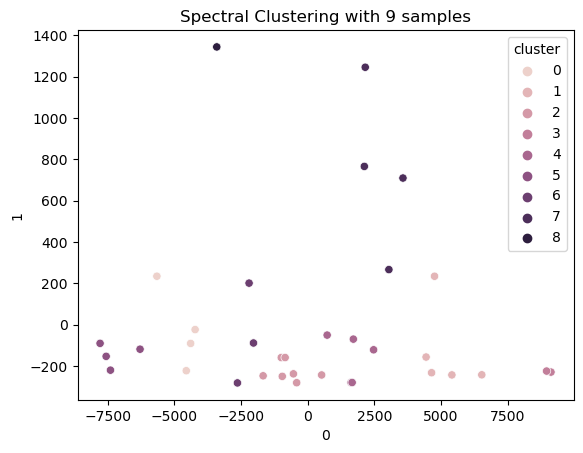

Silhouette Coefficient: 0.4890
Davies Bouldin Index: 0.4846


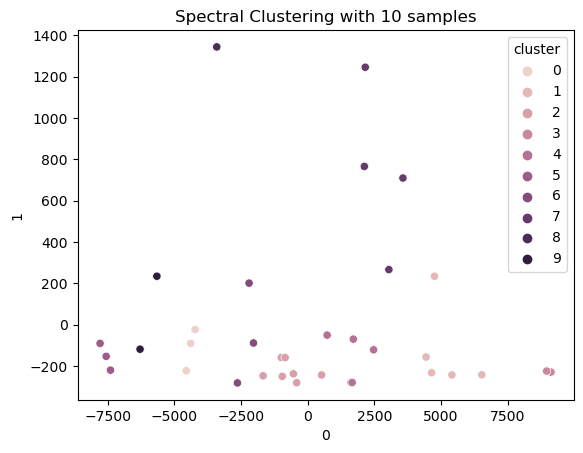

Silhouette Coefficient: 0.5225
Davies Bouldin Index: 0.4420


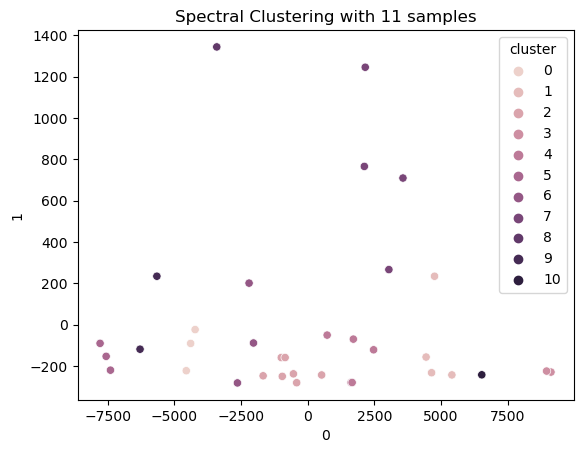

Silhouette Coefficient: 0.5078
Davies Bouldin Index: 0.4102


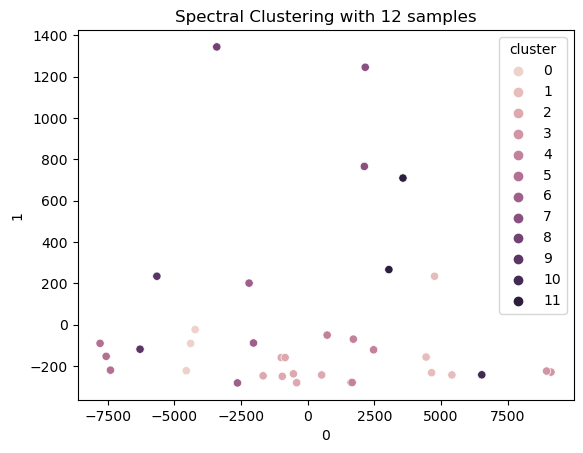

Silhouette Coefficient: 0.5287
Davies Bouldin Index: 0.3662


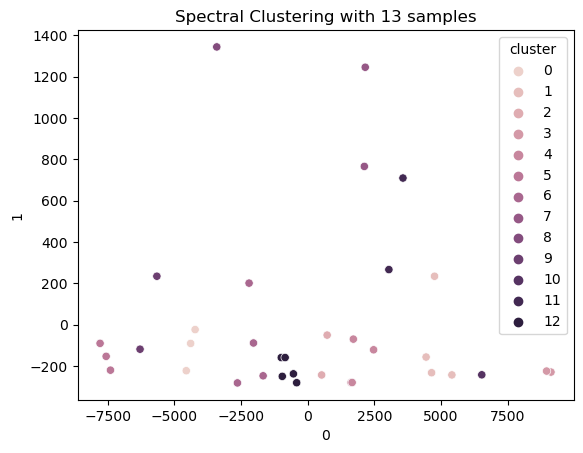

Silhouette Coefficient: 0.6109
Davies Bouldin Index: 0.3456


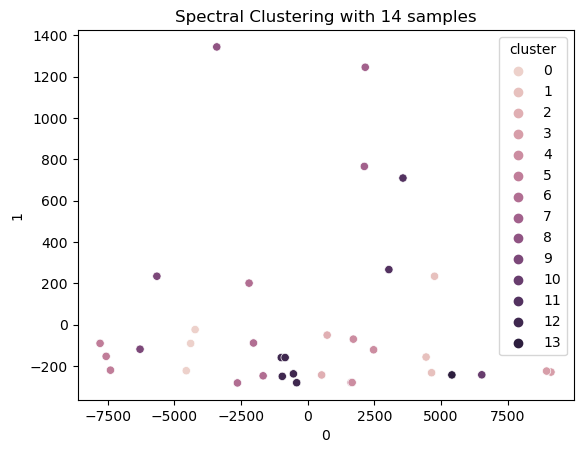

Silhouette Coefficient: 0.5934
Davies Bouldin Index: 0.3288


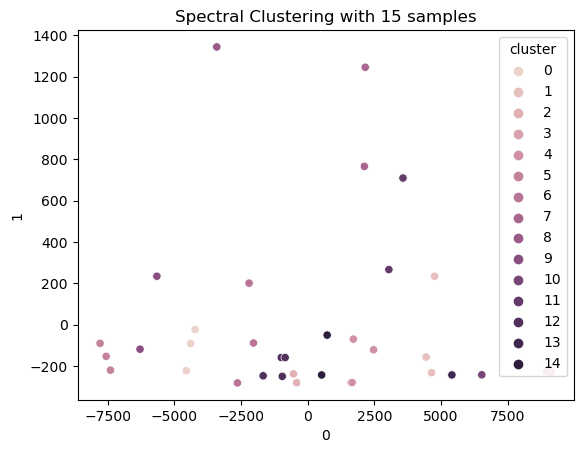

Silhouette Coefficient: 0.5413
Davies Bouldin Index: 0.3561


In [31]:
n = [9, 10, 11, 12, 13, 14, 15]  # 12
for i in n:
    GM = GaussianMixture(n_components=i, random_state=0) # covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
    cluster = GM.fit(df)
    cluster_id = pd.DataFrame(cluster.predict(df))

    d11 = pd.DataFrame()
    d11 = pd.concat([df,cluster_id],axis=1)

    
    d11.columns = [0, 1, "cluster"]

    sns.scatterplot(d11[0], d11[1], hue = d11['cluster'], legend="full")
    plt.title('Spectral Clustering with {} samples'.format(i))
    plt.show()
    

    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d11.iloc[:,:-1], d11['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d11.iloc[:,:-1], d11['cluster'])))

# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html (Model Selection 추가 bic, aic)
# https://rk1993.tistory.com/entry/AIC-BIC-Mallows-Cp-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0 (bic, aic)
# AIC, BIC를 최소화한다는 것은 우도를 가장 크게 하는 동시에 변수 개수는 적은 최적의 모델을 찾는 것
# Clustering에선 변수 개수가 아니라 군집 개수일 듯

## Hard-voting

In [32]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(df_raw.drop('adng_nm', axis=1))
# df_scaled = min_max_scaler.transform(df_raw.drop('adng_nm', axis=1))

In [33]:
km = KMeans(n_clusters=6, init='k-means++', random_state=0)
agg = AgglomerativeClustering(n_clusters=6)
ap = AffinityPropagation()
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=13, random_state=0)
ms = MeanShift(bandwidth=bandwidth)
# mb = MiniBatchKMeans(n_clusters=6, batch_size=26) #km과 결과가 같음
birch = Birch(n_clusters=13)
GM = GaussianMixture(n_components=12, random_state=0)

In [34]:
df_new = copy.deepcopy(df_raw)

In [35]:
df_new.head(3)

세대수  주차가능수       bpi  ev_traffic       포화도  x_x  x_y adng_nm
0  10839.0  546.0  0.038676   16.838410  0.000345    1    4     구갈동
1  12235.0  122.0  0.035247    6.826027  0.000243    0    2     구성동
2   6119.0   34.0  0.023412    3.861742  0.000115    0    2     기흥동

In [36]:
models = {'KMeans' : km,
         'AgglomerativeClustering' : agg,
         'AffinityPropagation' : ap,
         'MeanShift' : ms,
         'Birch' : birch,
         }

for model in models:
  models[model].fit(df)
  labels = models[model].labels_

  df_new[model] = labels.astype(str)



In [37]:
GM_labels = GM.fit_predict(df)

df_new['GaussianMixture'] = GM_labels.astype(str)

In [38]:
df_new.head(3)

세대수  주차가능수       bpi  ev_traffic       포화도  x_x  x_y adng_nm KMeans  \
0  10839.0  546.0  0.038676   16.838410  0.000345    1    4     구갈동      5   
1  12235.0  122.0  0.035247    6.826027  0.000243    0    2     구성동      1   
2   6119.0   34.0  0.023412    3.861742  0.000115    0    2     기흥동      2   

  AgglomerativeClustering AffinityPropagation MeanShift Birch GaussianMixture  
0                       0                   1         4     6              11  
1                       3                   4         2     0               1  
2                       1                   0         3     5               2

In [39]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_new.iloc[:, 0:7])
df_scaled = min_max_scaler.transform(df_new.iloc[:, 0:7])

In [40]:
df_scaled = pd.DataFrame(df_scaled)

In [41]:
df_raw.columns

Index(['세대수', '주차가능수', 'bpi', 'ev_traffic', '포화도', 'x_x', 'x_y', 'adng_nm'], dtype='object')

In [42]:
df_scaled.columns = ['세대수', '주차가능수', 'bpi', 'ev_traffic', '포화도', 'x_x', 'x_y']

In [43]:
df_scaled = pd.concat([df_scaled, df_new.iloc[:, 7:]], axis=1)

In [44]:
df_scaled.head(3)

세대수     주차가능수       bpi  ev_traffic       포화도       x_x  x_y adng_nm  \
0  0.640527  0.335587  0.709793    1.000000  0.083784  0.076923  1.0     구갈동   
1  0.723023  0.074985  0.623336    0.365455  0.051532  0.000000  0.5     구성동   
2  0.361600  0.020897  0.324954    0.177591  0.011054  0.000000  0.5     기흥동   

  KMeans AgglomerativeClustering AffinityPropagation MeanShift Birch  \
0      5                       0                   1         4     6   
1      1                       3                   4         2     0   
2      2                       1                   0         3     5   

  GaussianMixture  
0              11  
1               1  
2               2

In [45]:
df_scaled

세대수     주차가능수       bpi  ev_traffic       포화도       x_x   x_y  \
0   0.640527  0.335587  0.709793    1.000000  0.083784  0.076923  1.00   
1   0.723023  0.074985  0.623336    0.365455  0.051532  0.000000  0.50   
2   0.361600  0.020897  0.324954    0.177591  0.011054  0.000000  0.50   
3   0.401844  0.074985  0.376623    0.202715  0.079161  0.000000  0.00   
4   0.556613  0.000000  0.000566    0.135015  0.023064  0.000000  0.00   
5   0.410412  0.074985  0.000000    0.463993  0.000000  0.538462  0.50   
6   0.436000  0.000000  0.340157    0.028524  0.002399  0.000000  0.25   
7   0.125990  0.318377  0.469758    0.087235  0.315487  0.000000  0.00   
8   0.780227  0.021512  0.989269    0.626761  0.057906  0.000000  0.00   
9   0.561695  0.129072  0.731968    0.184419  0.056406  0.076923  0.00   
10  0.088642  0.101414  0.103520    0.514444  0.058757  0.076923  0.00   
11  0.013474  0.080516  0.554024    0.016582  1.000000  0.000000  0.00   
12  0.559036  0.000000  0.357049    0.310499  0.035215  0.000000  0.00   
13  0.503605  0.141364  0.143094    0.494504  0.010337  0.000000  0.00   
14  0.210791  0.159189  0.649690    0.000000  0.268401  0.076923  0.00   
15  0.428791  0.026429  0.038305    0.104396  0.042689  0.461538  0.00   
16  0.846531  0.021512  0.446643    0.436285  0.007244  0.000000  0.50   
17  0.606607  0.097111  0.224536    0.113073  0.036141  0.000000  0.00   
18  0.404089  0.019053  0.414019    0.160108  0.070354  0.153846  0.00   
19  1.000000  0.028888  0.510092    0.346852  0.006047  0.000000  0.50   
20  0.671729  0.607867  0.432333    0.441984  0.037649  0.000000  0.25   
21  0.735197  0.028273  0.365242    0.161905  0.006409  0.000000  0.00   
22  0.023047  0.039336  0.283430    0.216222  0.378725  0.076923  0.00   
23  0.588110  0.937923  0.187449    0.653179  0.022059  1.000000  0.50   
24  0.491372  0.022741  0.277178    0.433991  0.048630  0.000000  0.00   
25  0.304633  0.000000  0.463991    0.088690  0.063444  0.000000  0.00   
26  0.000000  0.119238  0.585132    0.000904  0.566002  0.000000  0.00   
27  0.340208  0.118623  0.624960    0.329722  0.115852  0.692308  0.00   
28  0.191171  0.036878  0.562644    0.318822  0.215766  0.230769  0.00   
29  0.990249  0.031961  1.000000    0.610048  0.074421  0.076923  0.00   
30  0.330457  0.296865  0.194528    0.055069  0.097267  0.000000  0.50   
31  0.258835  1.000000  0.828520    0.408656  0.199211  0.769231  0.75   
32  0.200863  0.118009  0.771754    0.529459  0.162905  0.000000  0.00   
33  0.586101  0.642901  0.438912    0.479385  0.184642  0.000000  0.00   
34  0.741756  0.315304  0.902651    0.271226  0.157520  0.000000  0.00   

   adng_nm KMeans AgglomerativeClustering AffinityPropagation MeanShift Birch  \
0      구갈동      5                       0                   1         4     6   
1      구성동      1                       3                   4         2     0   
2      기흥동      2                       1                   0         3     5   
3      남사읍      2                       1                   0         0     3   
4     동백1동      5                       0                   1         1     2   
5     동백2동      2                       1                   0         0     3   
6     동백3동      2                       1                   0         0     3   
7      동부동      0                       2                   2        10     1   
8      동천동      1                       3                   4         2     0   
9      마북동      5                       0                   1         1     2   
10     모현읍      4                       2                   2        10     1   
11     백암면      4                       2                   2         6     8   
12     보라동      5                       0                   1         1     2   
13     보정동      5                       0                   1         9    11   
14     상갈동      0                       5                   2         5     7   
15     상하동      2                       1       

In [46]:
rank = []

In [47]:
df_wv = df_scaled.groupby('KMeans').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv


세대수     주차가능수       bpi  ev_traffic       포화도       x_x  \
KMeans                                                                 
3       0.995125  0.030424  0.755046    0.478450  0.040234  0.038462   
1       0.749744  0.178242  0.626579    0.383936  0.053043  0.000000   
0       0.197530  0.326490  0.656473    0.268834  0.232354  0.215385   
5       0.565963  0.256300  0.341172    0.422674  0.055587  0.128205   
4       0.031291  0.085126  0.381527    0.187038  0.500871  0.038462   
2       0.379782  0.070204  0.308615    0.178979  0.053580  0.205128   

             x_y  Weighted_Value  
KMeans                            
3       0.250000        0.861095  
1       0.208333        0.711650  
0       0.150000        0.640525  
5       0.166667        0.597284  
4       0.000000        0.483799  
2       0.194444        0.394644

In [48]:
df_wv = df_scaled.groupby('AgglomerativeClustering').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv

세대수     주차가능수       bpi  ev_traffic       포화도  \
AgglomerativeClustering                                                       
4                        0.995125  0.030424  0.755046    0.478450  0.040234   
3                        0.765347  0.092317  0.665428    0.372327  0.056122   
5                        0.215415  0.328519  0.703152    0.314234  0.211571   
0                        0.576539  0.291457  0.350288    0.424605  0.053793   
2                        0.050230  0.131776  0.399173    0.167077  0.463794   
1                        0.379782  0.070204  0.308615    0.178979  0.053580   

                              x_x       x_y  Weighted_Value  
AgglomerativeClustering                                      
4                        0.038462  0.250000        0.861095  
3                        0.000000  0.200000        0.714317  
5                        0.269231  0.187500        0.694788  
0                        0.115385  0.175000        0.607387  
2                        0.030769  0.000000        0.471734  
1                        0.205128  0.194444        0.394644

In [49]:
df_wv = df_scaled.groupby('AffinityPropagation').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv

세대수     주차가능수       bpi  ev_traffic       포화도  \
AffinityPropagation                                                       
3                    0.995125  0.030424  0.755046    0.478450  0.040234   
4                    0.749744  0.178242  0.626579    0.383936  0.053043   
1                    0.565963  0.256300  0.341172    0.422674  0.055587   
2                    0.106747  0.121620  0.497494    0.210458  0.370755   
0                    0.367687  0.163184  0.360606    0.201946  0.068143   

                          x_x       x_y  Weighted_Value  
AffinityPropagation                                      
3                    0.038462  0.250000        0.861095  
4                    0.000000  0.208333        0.711650  
1                    0.128205  0.166667        0.597284  
2                    0.057692  0.000000        0.512855  
0                    0.261538  0.250000        0.458677

In [50]:
df_wv = df_scaled.groupby('MeanShift').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv

세대수     주차가능수       bpi  ev_traffic       포화도       x_x  \
MeanShift                                                                 
12         0.258835  1.000000  0.828520    0.408656  0.199211  0.769231   
4          0.656128  0.471727  0.571063    0.720992  0.060717  0.038462   
7          0.995125  0.030424  0.755046    0.478450  0.040234  0.038462   
8          0.587106  0.790412  0.313180    0.566282  0.103351  0.500000   
11         0.846531  0.021512  0.446643    0.436285  0.007244  0.000000   
2          0.745051  0.110018  0.720125    0.356337  0.068342  0.000000   
5          0.200942  0.104692  0.661363    0.282760  0.215691  0.102564   
6          0.012174  0.079697  0.474196    0.077902  0.648242  0.025641   
9          0.497488  0.082053  0.210136    0.464247  0.029484  0.000000   
3          0.334225  0.109096  0.402108    0.162768  0.071904  0.173077   
10         0.107316  0.209896  0.286639    0.300839  0.187122  0.038462   
1          0.570987  0.056546  0.328530    0.185752  0.037707  0.019231   
0          0.416227  0.039090  0.233821    0.191947  0.038921  0.230769   

             x_y  Weighted_Value  
MeanShift                         
12         0.750        1.034976  
4          0.625        0.992552  
7          0.250        0.861095  
8          0.250        0.802844  
11         0.500        0.714783  
2          0.125        0.714201  
5          0.000        0.581392  
6          0.000        0.508685  
9          0.000        0.482099  
3          0.250        0.432328  
10         0.000        0.416307  
1          0.000        0.379721  
0          0.150        0.364496

In [51]:
# df_wv = df_new.groupby('MiniBatchKMeans').mean() 

# df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
# df_wv # 1

In [52]:
df_wv = df_scaled.groupby('Birch').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv

세대수     주차가능수       bpi  ev_traffic       포화도       x_x    x_y  \
Birch                                                                        
10     0.258835  1.000000  0.828520    0.408656  0.199211  0.769231  0.750   
6      0.656128  0.471727  0.571063    0.720992  0.060717  0.038462  0.625   
4      0.995125  0.030424  0.755046    0.478450  0.040234  0.038462  0.250   
12     0.587106  0.790412  0.313180    0.566282  0.103351  0.500000  0.250   
9      0.846531  0.021512  0.446643    0.436285  0.007244  0.000000  0.500   
0      0.745051  0.110018  0.720125    0.356337  0.068342  0.000000  0.125   
7      0.200942  0.104692  0.661363    0.282760  0.215691  0.102564  0.000   
8      0.012174  0.079697  0.474196    0.077902  0.648242  0.025641  0.000   
11     0.497488  0.082053  0.210136    0.464247  0.029484  0.000000  0.000   
5      0.334225  0.109096  0.402108    0.162768  0.071904  0.173077  0.250   
1      0.107316  0.209896  0.286639    0.300839  0.187122  0.038462  0.000   
2      0.570987  0.056546  0.328530    0.185752  0.037707  0.019231  0.000   
3      0.416227  0.039090  0.233821    0.191947  0.038921  0.230769  0.150   

       Weighted_Value  
Birch                  
10           1.034976  
6            0.992552  
4            0.861095  
12           0.802844  
9            0.714783  
0            0.714201  
7            0.581392  
8            0.508685  
11           0.482099  
5            0.432328  
1            0.416307  
2            0.379721  
3            0.364496

In [53]:
df_wv = df_scaled.groupby('GaussianMixture').mean() 

df_wv['Weighted_Value'] = 0.2 * df_wv['세대수'] + 0.1 * df_wv['주차가능수'] + 0.4 * df_wv['bpi'] + 0.6 * df_wv['ev_traffic'] + 0.4 * df_wv['포화도'] + 0.1 * df_wv['x_x'] + 0.2 * df_wv['x_y']
df_wv = df_wv.sort_values(by='Weighted_Value', ascending=False)
rank.append(df_wv.index)
df_wv

세대수     주차가능수       bpi  ev_traffic       포화도       x_x  \
GaussianMixture                                                                 
8                0.258835  1.000000  0.828520    0.408656  0.199211  0.769231   
11               0.656128  0.471727  0.571063    0.720992  0.060717  0.038462   
3                0.995125  0.030424  0.755046    0.478450  0.040234  0.038462   
7                0.587106  0.790412  0.313180    0.566282  0.103351  0.500000   
10               0.846531  0.021512  0.446643    0.436285  0.007244  0.000000   
1                0.745051  0.110018  0.720125    0.356337  0.068342  0.000000   
0                0.200942  0.104692  0.661363    0.282760  0.215691  0.102564   
5                0.012174  0.079697  0.474196    0.077902  0.648242  0.025641   
6                0.325099  0.138496  0.427826    0.157827  0.092187  0.230769   
9                0.107316  0.209896  0.286639    0.300839  0.187122  0.038462   
4                0.557511  0.073510  0.291443    0.247502  0.032233  0.015385   
2                0.419158  0.034156  0.253034    0.224474  0.036327  0.164835   

                      x_y  Weighted_Value  
GaussianMixture                            
8                0.750000        1.034976  
11               0.625000        0.992552  
3                0.250000        0.861095  
7                0.250000        0.802844  
10               0.500000        0.714783  
1                0.125000        0.714201  
0                0.000000        0.581392  
5                0.000000        0.508685  
6                0.166667        0.437981  
9                0.000000        0.416307  
4                0.000000        0.398363  
2                0.178571        0.389874

In [54]:
adng_list = []

In [55]:
rank[0][0]

'3'

In [56]:
# Rank 1
adng_list.extend(list(df_new.loc[df_new['KMeans'] == rank[0][0], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AgglomerativeClustering'] == rank[1][0], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AffinityPropagation'] == rank[2][0], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['MeanShift'] == rank[3][0], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['Birch'] == rank[4][0], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['GaussianMixture'] == rank[5][0], 'adng_nm']))

In [57]:
# Rank 2
adng_list.extend(list(df_new.loc[df_new['KMeans'] == rank[0][1], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AgglomerativeClustering'] == rank[1][1], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AffinityPropagation'] == rank[2][1], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['MeanShift'] == rank[3][1], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['Birch'] == rank[4][1], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['GaussianMixture'] == rank[5][1], 'adng_nm']))

In [58]:
# Rank 3
adng_list.extend(list(df_new.loc[df_new['KMeans'] == rank[0][2], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AgglomerativeClustering'] == rank[0][2], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['AffinityPropagation'] == rank[0][2], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['MeanShift'] == rank[0][2], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['Birch'] == rank[0][2], 'adng_nm']))
adng_list.extend(list(df_new.loc[df_new['GaussianMixture'] == rank[0][2], 'adng_nm']))

In [69]:
from collections import Counter

Counter(adng_list)

성복동      3
죽전1동     3
중앙동      5
구성동      4
동천동      4
상현1동     3
신갈동      6
신봉동      4
풍덕천2동    4
구갈동      4
동부동      1
상갈동      2
이동읍      2
포곡읍      2
동백1동     1
마북동      1
보라동      1
보정동      1
상현2동     1
역삼동      1
영덕1동     1
풍덕천1동    1
기흥동      1
남사읍      2
동백2동     2
동백3동     2
상하동      2
서농동      2
영덕2동     1
유림동      1
죽전2동     1
dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

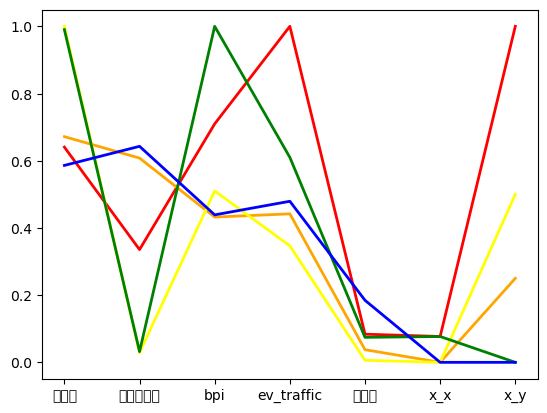

In [62]:
rank1 = ['구갈동', '신갈동']
rank2 = ['성복동', '죽전1동', '풍덕천1동', '역삼동', '상현2동']
rank3 = ['동백1동', '마북동', '보라동', '보정동', '영덕1동']


data = df_scaled.iloc[:, :7].transpose()

# plt.plot(data, 'gray')

plt.plot(data[0], 'red', linewidth=2)
plt.plot(data[20], 'orange', linewidth=2)
plt.plot(data[19], 'yellow', linewidth=2)
plt.plot(data[29], 'green', linewidth=2)
plt.plot(data[33], 'blue', linewidth=2)


# for i in rank1:
#   idx = df_scaled[df_scaled['adng_nm'] == i].index[0]
#   plt.plot(data[idx], 'red')

# for i in rank2:
#   idx = df_scaled[df_scaled['adng_nm'] == i].index[0]
#   plt.plot(data[idx], 'orange')

# for i in rank3:
#   idx = df_scaled[df_scaled['adng_nm'] == i].index[0]
#   plt.plot(data[idx], 'yellow')


In [63]:
data

0         1         2         3         4         5   \
세대수         0.640527  0.723023  0.361600  0.401844  0.556613  0.410412   
주차가능수       0.335587  0.074985  0.020897  0.074985  0.000000  0.074985   
bpi         0.709793  0.623336  0.324954  0.376623  0.000566  0.000000   
ev_traffic  1.000000  0.365455  0.177591  0.202715  0.135015  0.463993   
포화도         0.083784  0.051532  0.011054  0.079161  0.023064  0.000000   
x_x         0.076923  0.000000  0.000000  0.000000  0.000000  0.538462   
x_y         1.000000  0.500000  0.500000  0.000000  0.000000  0.500000   

                  6         7         8         9   ...        25        26  \
세대수         0.436000  0.125990  0.780227  0.561695  ...  0.304633  0.000000   
주차가능수       0.000000  0.318377  0.021512  0.129072  ...  0.000000  0.119238   
bpi         0.340157  0.469758  0.989269  0.731968  ...  0.463991  0.585132   
ev_traffic  0.028524  0.087235  0.626761  0.184419  ...  0.088690  0.000904   
포화도         0.002399  0.315487  0.057906  0.056406  ...  0.063444  0.566002   
x_x         0.000000  0.000000  0.000000  0.076923  ...  0.000000  0.000000   
x_y         0.250000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

                  27        28        29        30        31        32  \
세대수         0.340208  0.191171  0.990249  0.330457  0.258835  0.200863   
주차가능수       0.118623  0.036878  0.031961  0.296865  1.000000  0.118009   
bpi         0.624960  0.562644  1.000000  0.194528  0.828520  0.771754   
ev_traffic  0.329722  0.318822  0.610048  0.055069  0.408656  0.529459   
포화도         0.115852  0.215766  0.074421  0.097267  0.199211  0.162905   
x_x         0.692308  0.230769  0.076923  0.000000  0.769231  0.000000   
x_y         0.000000  0.000000  0.000000  0.500000  0.750000  0.000000   

                  33        34  
세대수         0.586101  0.741756  
주차가능수       0.642901  0.315304  
bpi         0.438912  0.902651  
ev_traffic  0.479385  0.271226  
포화도         0.184642  0.157520  
x_x         0.000000  0.000000  
x_y         0.000000  0.000000  

[7 rows x 35 columns]